# Что такое сезонность? #

Мы говорим, что временной ряд проявляет **сезонность**, когда есть регулярное периодическое изменение среднего значения ряда. Сезонные изменения обычно следуют часам и календарю — типичны повторения в пределах дня, недели или года. Сезонность часто обусловлена циклами природы в течение дней и лет или социальными привычками, связанными с датами и временем.

<figure style="padding: 1em;">
<img src="https://storage.googleapis.com/kaggle-media/learn/images/ViYbSxS.png" width=800, alt="">
<figcaption style="textalign: center; font-style: italic"><center>Сезонные паттерны в четырёх временных рядах.
</center></figcaption>
</figure>

Мы изучим два типа признаков для моделирования сезонности. Первый тип — индикаторы — лучше подходит для сезона с небольшим числом наблюдений, например, недельная сезонность при дневных данных. Второй тип — признаки Фурье — лучше подходит для сезона с большим числом наблюдений, например, годовая сезонность при дневных данных.

# Сезонные графики и сезонные индикаторы #

Так же, как мы использовали график скользящего среднего, чтобы обнаружить тренд в ряду, мы можем использовать **сезонный график**, чтобы выявить сезонные паттерны.

Сезонный график показывает сегменты временного ряда, нанесённые на общий период — «сезон», который вы хотите наблюдать. На рисунке показан сезонный график дневных просмотров статьи Википедии *Trigonometry*: дневные просмотры нанесены на общий *недельный* период.

<figure style="padding: 1em;">
<img src="https://storage.googleapis.com/kaggle-media/learn/images/bd7D4NJ.png" width=800, alt="">
<figcaption style="textalign: center; font-style: italic"><center>В этом ряду видна чёткая недельная сезонность: выше в будни и снижается к выходным.
</center></figcaption>
</figure>

### Сезонные индикаторы

**Сезонные индикаторы** — это бинарные признаки, которые отражают сезонные различия в уровне временного ряда. Сезонные индикаторы получаются, если рассматривать сезонный период как категориальный признак и применить one‑hot кодирование.

При one‑hot кодировании дней недели мы получаем недельные сезонные индикаторы. Создание недельных индикаторов для ряда *Trigonometry* даст нам шесть новых «фиктивных» признаков. (Линейная регрессия работает лучше, если один индикатор удалить; ниже мы выбрали понедельник.)

| Date       | Tuesday | Wednesday | Thursday | Friday | Saturday | Sunday |
|------------|---------|-----------|----------|--------|----------|--------|
| 2016-01-04 | 0.0     | 0.0       | 0.0      | 0.0    | 0.0      | 0.0    |
| 2016-01-05 | 1.0     | 0.0       | 0.0      | 0.0    | 0.0      | 0.0    |
| 2016-01-06 | 0.0     | 1.0       | 0.0      | 0.0    | 0.0      | 0.0    |
| 2016-01-07 | 0.0     | 0.0       | 1.0      | 0.0    | 0.0      | 0.0    |
| 2016-01-08 | 0.0     | 0.0       | 0.0      | 1.0    | 0.0      | 0.0    |
| 2016-01-09 | 0.0     | 0.0       | 0.0      | 0.0    | 1.0      | 0.0    |
| 2016-01-10 | 0.0     | 0.0       | 0.0      | 0.0    | 0.0      | 1.0    |
| 2016-01-11 | 0.0     | 0.0       | 0.0      | 0.0    | 0.0      | 0.0    |
| ...        | ...     | ...       | ...      | ...    | ...      | ...    |


Добавление сезонных индикаторов в обучающие данные помогает моделям различать средние значения внутри сезонного периода:

<figure style="padding: 1em;">
<img src="https://storage.googleapis.com/kaggle-media/learn/images/hIlF5j5.png" width=800, alt="">
<figcaption style="textalign: center; font-style: italic"><center>Обычная линейная регрессия учится средним значениям в каждом моменте сезона.</center></figcaption>
</figure>

Индикаторы работают как переключатели Вкл / Выкл. В любой момент максимум один из индикаторов может быть равен `1` (*Вкл*). Линейная регрессия выучивает базовое значение `2379` для `Mon`, а затем корректирует его значением индикатора, который *включён* в этот день; остальные равны `0` и исчезают.

# Признаки Фурье и периодограмма #

Тип признаков, о котором мы сейчас говорим, лучше подходит для длинных сезонов с большим числом наблюдений, когда индикаторы были бы непрактичными. Вместо создания признака для каждой даты признаки Фурье пытаются уловить общую форму сезонной кривой всего несколькими признаками.

Давайте посмотрим на график годовой сезонности в ряду *Trigonometry*. Обратите внимание на повторения разных частот: длинное движение вверх‑вниз три раза в год, короткие недельные колебания 52 раза в год и, возможно, другие.

<figure style="padding: 1em;">
<img src="https://storage.googleapis.com/kaggle-media/learn/images/NJcaEdI.png" width=800, alt="">
<figcaption style="textalign: center; font-style: italic"><center>Годовая сезонность в ряду <em>Wiki Trigonometry</em>.</center></figcaption>
</figure>

Именно эти частоты внутри сезона мы пытаемся захватить с помощью признаков Фурье. Идея в том, чтобы включить в обучающие данные периодические кривые с теми же частотами, что и сезон, который мы моделируем. Эти кривые — синус и косинус.

**Признаки Фурье** — это пары синусоид и косинусоид, по одной паре для каждой потенциальной частоты в сезоне, начиная с самой длинной. Пары Фурье для годовой сезонности будут иметь частоты: один раз в год, два раза в год, три раза в год и так далее.

<figure style="padding: 1em;">
<img src="https://storage.googleapis.com/kaggle-media/learn/images/bKOjdU7.png" width=600, alt="Вверху и внизу показаны синус и косинус. В верхнем графике частота — раз в год, в нижнем — два раза в год.">
<figcaption style="textalign: center; font-style: italic"><center>Первые две пары Фурье для годовой сезонности. <strong>Сверху: </strong>частота один раз в год. <strong>Снизу: </strong>частота два раза в год.</center></figcaption>
</figure>

Если добавить набор таких синусоид/косинусоид в обучающие данные, алгоритм линейной регрессии подберёт веса, которые будут соответствовать сезонной компоненте целевого ряда. Рисунок иллюстрирует, как линейная регрессия использовала четыре пары Фурье, чтобы смоделировать годовую сезонность в ряду *Wiki Trigonometry*.

<figure style="padding: 1em;">
<img src="https://storage.googleapis.com/kaggle-media/learn/images/mijPhko.png" width=600, alt="">
<figcaption style="textalign: center; font-style: italic"><center><strong>Сверху: </strong>кривые для четырёх пар Фурье — сумма синуса и косинуса с коэффициентами регрессии. Каждая кривая моделирует свою частоту. <strong>Снизу: </strong>сумма этих кривых приближает сезонный паттерн.</center></figcaption>
</figure>

Обратите внимание, что нам понадобилось всего восемь признаков (четыре пары синус/косинус), чтобы хорошо оценить годовую сезонность. Сравните это с методом сезонных индикаторов, который потребовал бы сотни признаков (по одному на каждый день года). Моделируя только «главный эффект» сезонности с помощью признаков Фурье, вы обычно добавляете куда меньше признаков в обучающие данные, что снижает время вычислений и риск переобучения.

### Выбор признаков Фурье с помощью периодограммы

Сколько пар Фурье на самом деле включать в набор признаков? На этот вопрос помогает ответить периодограмма. **Периодограмма** показывает силу частот во временном ряду. В частности, значение по оси y равно `(a ** 2 + b ** 2) / 2`, где `a` и `b` — коэффициенты синуса и косинуса на этой частоте (как на графике *Fourier Components* выше).

<figure style="padding: 1em;">
<img src="https://storage.googleapis.com/kaggle-media/learn/images/PK6WEe3.png" width=600, alt="">
<figcaption style="textalign: center; font-style: italic"><center>Периодограмма для ряда <em>Wiki Trigonometry</em>.</center></figcaption>
</figure>

Слева направо периодограмма заметно падает после *Quarterly* — четырёх раз в год. Именно поэтому мы выбрали четыре пары Фурье для моделирования годового сезона. Частоту *Weekly* мы игнорируем, так как её лучше моделировать индикаторами.

### Вычисление признаков Фурье (необязательно)

Знание того, как вычисляются признаки Фурье, не обязательно для их использования, но если детали прояснят картину, то скрытая ячейка ниже показывает, как набор признаков Фурье можно получить из индекса временного ряда. (В практических задачах мы будем использовать функцию из библиотеки `statsmodels`.)


In [1]:

import numpy as np


def fourier_features(index, freq, order):
    time = np.arange(len(index), dtype=np.float32)
    k = 2 * np.pi * (1 / freq) * time
    features = {}
    for i in range(1, order + 1):
        features.update({
            f"sin_{freq}_{i}": np.sin(i * k),
            f"cos_{freq}_{i}": np.cos(i * k),
        })
    return pd.DataFrame(features, index=index)


# Compute Fourier features to the 4th order (8 new features) for a
# series y with daily observations and annual seasonality:
#
# fourier_features(y, freq=365.25, order=4)

# Пример — Tunnel Traffic #

Мы снова продолжим с набором данных *Tunnel Traffic*. Эта скрытая ячейка загружает данные и определяет две функции: `seasonal_plot` и `plot_periodogram`.


In [2]:

from pathlib import Path
from warnings import simplefilter

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from statsmodels.tsa.deterministic import CalendarFourier, DeterministicProcess

simplefilter("ignore")

# Set Matplotlib defaults
plt.rc("figure", autolayout=True, figsize=(11, 5))
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=16,
    titlepad=10,
)
plot_params = dict(
    color="0.75",
    style=".-",
    markeredgecolor="0.25",
    markerfacecolor="0.25",
    legend=False,
)
%config InlineBackend.figure_format = 'retina'


# annotations: https://stackoverflow.com/a/49238256/5769929
def seasonal_plot(X, y, period, freq, ax=None):
    if ax is None:
        _, ax = plt.subplots()
    palette = sns.color_palette("husl", n_colors=X[period].nunique(),)
    ax = sns.lineplot(
        x=freq,
        y=y,
        hue=period,
        data=X,
        ci=False,
        ax=ax,
        palette=palette,
        legend=False,
    )
    ax.set_title(f"Seasonal Plot ({period}/{freq})")
    for line, name in zip(ax.lines, X[period].unique()):
        y_ = line.get_ydata()[-1]
        ax.annotate(
            name,
            xy=(1, y_),
            xytext=(6, 0),
            color=line.get_color(),
            xycoords=ax.get_yaxis_transform(),
            textcoords="offset points",
            size=14,
            va="center",
        )
    return ax


def plot_periodogram(ts, detrend='linear', ax=None):
    from scipy.signal import periodogram
    fs = pd.Timedelta("365D") / pd.Timedelta("1D")
    freqencies, spectrum = periodogram(
        ts,
        fs=fs,
        detrend=detrend,
        window="boxcar",
        scaling='spectrum',
    )
    if ax is None:
        _, ax = plt.subplots()
    ax.step(freqencies, spectrum, color="purple")
    ax.set_xscale("log")
    ax.set_xticks([1, 2, 4, 6, 12, 26, 52, 104])
    ax.set_xticklabels(
        [
            "Annual (1)",
            "Semiannual (2)",
            "Quarterly (4)",
            "Bimonthly (6)",
            "Monthly (12)",
            "Biweekly (26)",
            "Weekly (52)",
            "Semiweekly (104)",
        ],
        rotation=30,
    )
    ax.ticklabel_format(axis="y", style="sci", scilimits=(0, 0))
    ax.set_ylabel("Variance")
    ax.set_title("Periodogram")
    return ax


data_dir = Path("../dataset/")
tunnel = pd.read_csv(data_dir / "tunnel.csv", parse_dates=["Day"])
tunnel = tunnel.set_index("Day").to_period("D")

Давайте посмотрим на сезонные графики для недели и для года.


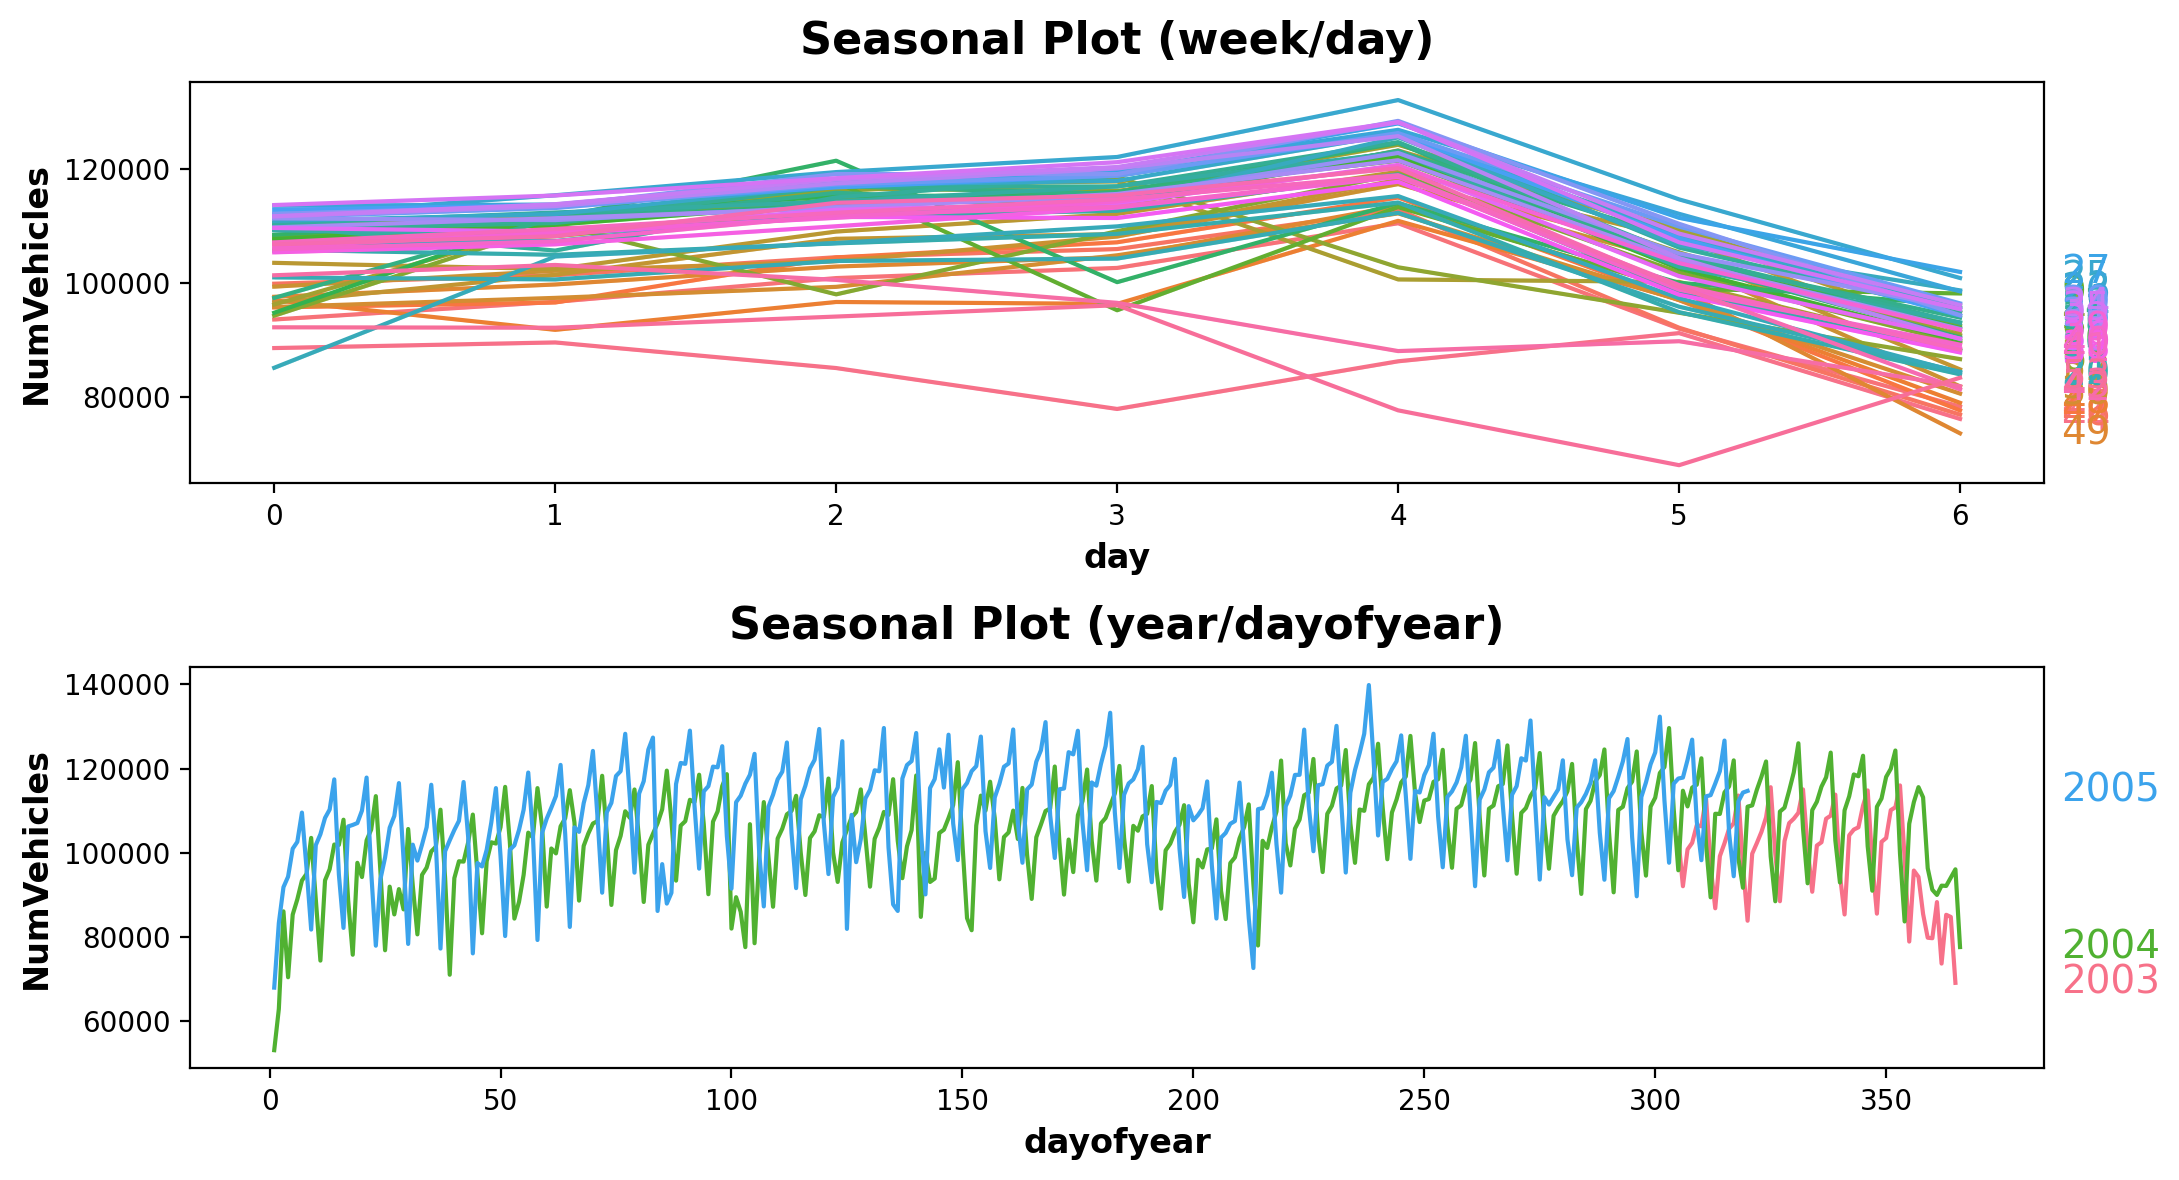

In [3]:
X = tunnel.copy()

# days within a week
X["day"] = X.index.dayofweek  # the x-axis (freq)
X["week"] = X.index.week  # the seasonal period (period)

# days within a year
X["dayofyear"] = X.index.dayofyear
X["year"] = X.index.year
fig, (ax0, ax1) = plt.subplots(2, 1, figsize=(11, 6))
seasonal_plot(X, y="NumVehicles", period="week", freq="day", ax=ax0)
seasonal_plot(X, y="NumVehicles", period="year", freq="dayofyear", ax=ax1);

Теперь посмотрим на периодограмму:


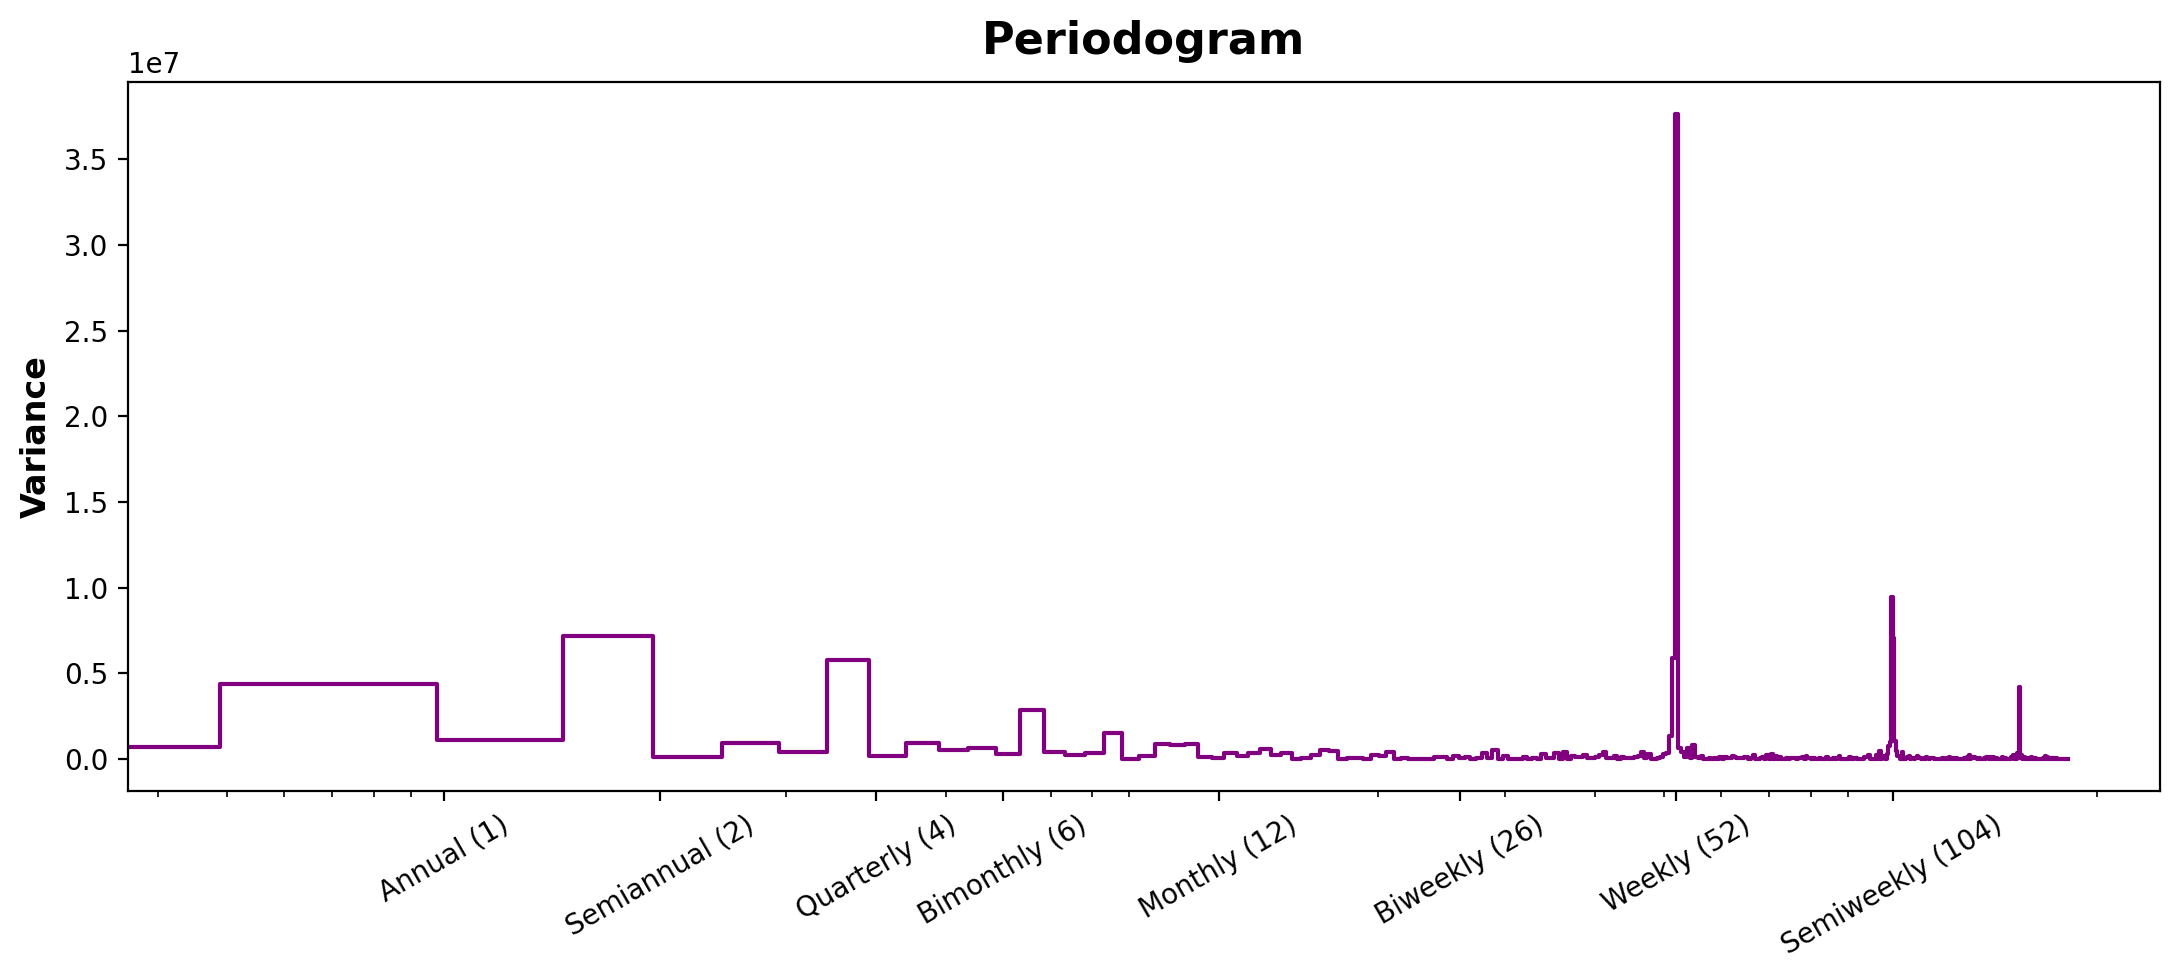

In [4]:
plot_periodogram(tunnel.NumVehicles);

Периодограмма согласуется с сезонными графиками выше: сильная недельная сезонность и более слабая годовая. Недельную сезонность мы будем моделировать индикаторами, а годовую — признаками Фурье. Справа налево периодограмма снижается между *Bimonthly (6)* и *Monthly (12)*, поэтому используем 10 пар Фурье.

Мы создадим сезонные признаки с помощью `DeterministicProcess` — того же инструмента, который использовали в Уроке 2 для тренда. Чтобы использовать два сезонных периода (недельный и годовой), нам нужно задать один из них как «дополнительный термин»:


In [5]:
from statsmodels.tsa.deterministic import CalendarFourier, DeterministicProcess

fourier = CalendarFourier(freq="A", order=10)  # 10 sin/cos pairs for "A"nnual seasonality

dp = DeterministicProcess(
    index=tunnel.index,
    constant=True,               # dummy feature for bias (y-intercept)
    order=1,                     # trend (order 1 means linear)
    seasonal=True,               # weekly seasonality (indicators)
    additional_terms=[fourier],  # annual seasonality (fourier)
    drop=True,                   # drop terms to avoid collinearity
)

X = dp.in_sample()  # create features for dates in tunnel.index

Когда набор признаков создан, мы готовы обучить модель и сделать прогнозы. Мы добавим 90‑дневный прогноз, чтобы увидеть, как модель экстраполирует за пределы обучающих данных. Код здесь такой же, как в предыдущих уроках.


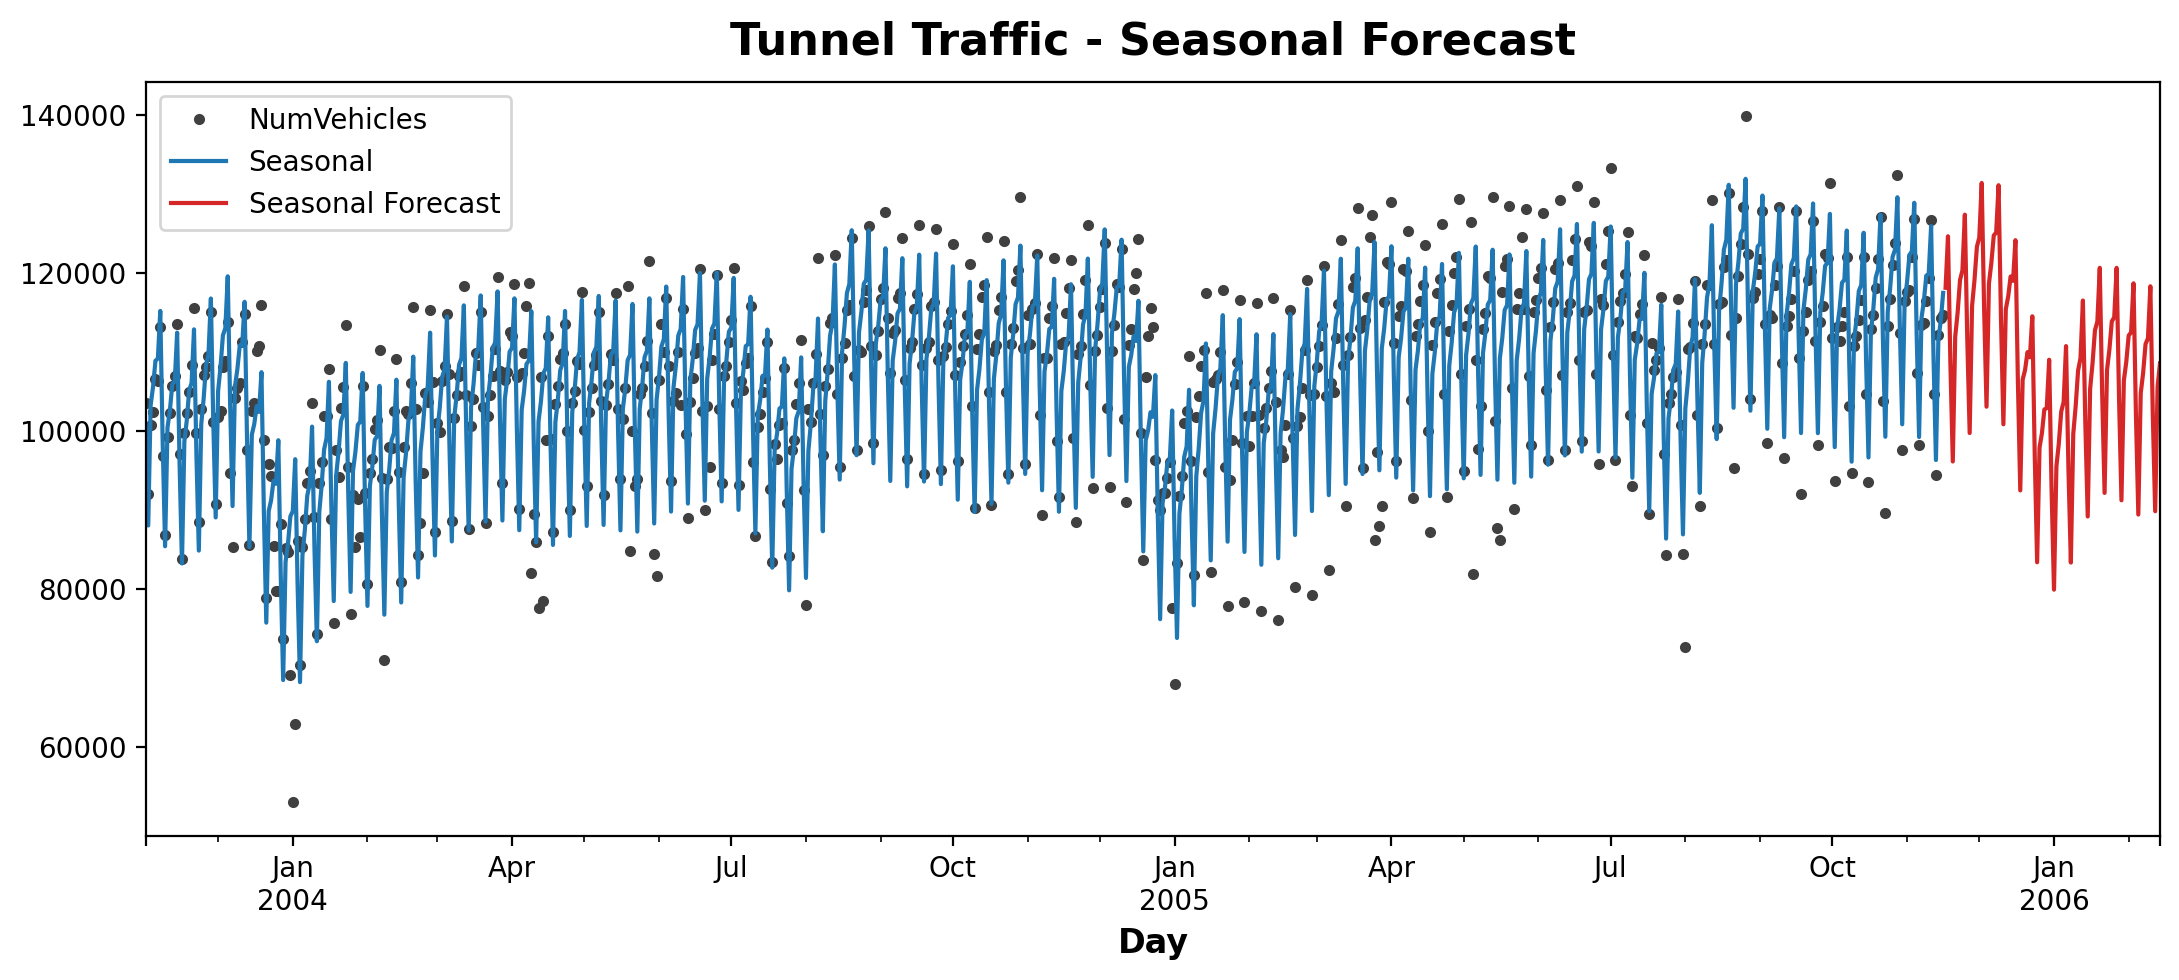

In [6]:

y = tunnel["NumVehicles"]

model = LinearRegression(fit_intercept=False)
_ = model.fit(X, y)

y_pred = pd.Series(model.predict(X), index=y.index)
X_fore = dp.out_of_sample(steps=90)
y_fore = pd.Series(model.predict(X_fore), index=X_fore.index)

ax = y.plot(color='0.25', style='.', title="Tunnel Traffic - Seasonal Forecast")
ax = y_pred.plot(ax=ax, label="Seasonal")
ax = y_fore.plot(ax=ax, label="Seasonal Forecast", color='C3')
_ = ax.legend()

---

Возможностей улучшить прогнозы на временных рядах ещё больше. В следующем уроке мы узнаем, как использовать сами временные ряды как признаки. Использование временных рядов как входов прогнозирования позволяет моделировать ещё один компонент, часто встречающийся в рядах: *циклы*.

# Ваша очередь #

[**Создайте сезонные признаки для Store Sales**](https://www.kaggle.com/kernels/fork/19615991) и расширьте эти техники на учёт праздничных эффектов.


---




*Есть вопросы или комментарии? Посетите [форум обсуждений курса](https://www.kaggle.com/learn/time-series/discussion), чтобы пообщаться с другими учащимися.*
